In [40]:
import os
import csv
import numpy as np

class Result:
    
    def __init__(self, name, age):
        self.name = name
        self.counts = dict()
        self.snp_sums = dict()
        self.age = age
        self.snps = dict()
        
    def set_count(self, kmer_name, count):
        self.counts[kmer_name] = count
        
    def normalized_tel(self):
        
        return (self.tel_count()/self.counts['CTGGGCGACAGAGCGAGACTCCGTC'])
    
    def tel_count(self):
        return self.counts['TTAGGGTTAGGGTTAGGGTTAGGGT']
        
    def get_label(self):
        return "{}:{}, {}".format(self.name[7:], 
                              int(self.counts['GAGTCAAAAGCAGATACGTGTGTCA']), int(self.counts['GAGTCAAAAGCAGATACATGTGTCA']))
        
    def __str__(self):
        return 'Result {}, age: {}, {} | {}'.format(self.name, self.age, self.tel_count(), self.normalized_tel())
    
    def __repr__(self):
        return 'Result {}, age: {}, {} | {}'.format(self.name, self.age, self.tel_count(), self.normalized_tel())
    
    def get_snp_vals(self):
        result = list()
        for k,s in self.snps.iteritems():
            if s['main'] > 2:
                result.append(True)
            else:
                result.append(False)
                
            if s['minor'] > 2:
                result.append(True)
            else:
                result.append(False)
        return result
        
    
    def get_input(self):
        output = list((
            int(self.tel_count()/self.counts['CTCCACCTCCCGGGTTCACGCCATT']),
            1
        ))
            
        snps = self.get_snp_vals()
        output = output+snps
        return output
    
    def calculate_snps(self):
        with open ('./static/snp_kmers.txt') as f:
            reader = csv.reader(f, delimiter='\t')
            for row in reader:
                name = row[0]
                alt = False
                if name[0:4] == 'ALT_':
                    name = name[4:].split(':')[0]
                    alt = True
                else:
                    name = name.split(':')[0]
                
                if name not in self.snps:
                    self.snps[name] = dict()
                    self.snps[name]['main'] = 0
                    self.snps[name]['minor'] = 0
                    
                count = int(self.counts[row[1].strip()])
                    
                if alt:
                    self.snps[name]['minor'] += count
                else:
                    self.snps[name]['main'] += count
                    

                    
        
        
ages = dict()
with open('./static/SraRunTable.txt') as run_table:
    r = csv.reader(run_table, delimiter='\t')
    r.next()
    for row in r:
        ages[row[8]] = row[11]
        
def get_age(name):
    return int(ages[name])
    

results = list()
for file in os.listdir('./files'):
    name = file[:-4]
    try:
        age = get_age(name)
    except:
        continue
    result = Result(name, age)
    with open('./files/'+file) as f:
        reader = csv.reader(f, delimiter='\t')  
        for row in reader:
            result.set_count(row[0], float(row[1]))
    result.calculate_snps()
    results.append(result)

[49, 37, 42, 44, 45, 44, 32, 53, 36, 42, 58, 57, 41, 56, 51, 47, 32, 43, 38, 45, 38, 38, 42, 53, 49, 43, 57, 43, 30, 48, 31, 38, 60, 46, 39, 45, 45, 48, 46, 30, 55, 45, 60, 51, 46, 57, 30, 43, 42, 55, 60, 40, 52, 50, 45, 47, 47, 52, 38, 51, 47, 48, 53, 52, 42, 35, 51, 55, 40, 50, 58, 56, 43, 30, 33, 47, 58, 53, 59, 37, 52, 56, 54, 40, 49, 34, 55, 50] [7.025467148884871, 7.8365335598980455, 5.734281308891554, 5.589450010222858, 7.255148435410538, 8.486315429353404, 6.840533545689826, 5.0071264952914225, 6.255946530371535, 9.688365051903114, 4.639903129657228, 5.361286723689104, 7.7740303541315345, 6.58731853116994, 11.658754355400697, 6.3772900763358775, 9.323595146871009, 9.890712570056046, 6.040510366826156, 5.135454848383872, 6.3417117403754375, 8.737481530126416, 9.760008383986586, 7.125542064180399, 5.301303942874884, 4.073084054388134, 7.7792746113989635, 7.563198212575806, 6.2701255230125525, 5.680105170902717, 7.733472149921916, 5.666597424179477, 6.30287618379516, 4.07596658247

<IPython.core.display.Javascript object>


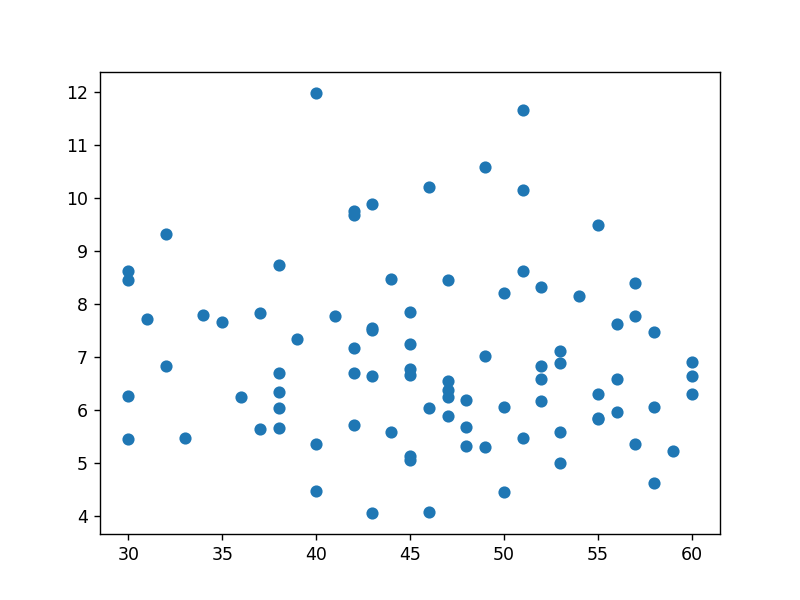

In [38]:
%matplotlib nbagg

import matplotlib.pyplot as plt

x = list(map(lambda r: r.age, results))
y = list(map(lambda r: r.normalized_tel(), results))
labels = list(map(lambda r: r.get_label(), results))

print x,y
plt.scatter(x, y)

for label, x, y in zip(labels, x,y):
    break
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Embedding, Input, Conv2D,MaxPooling2D, LSTM
from keras.layers.convolutional import Conv1D
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical,normalize

inputs = list(map(lambda r: r.get_input(), results))
outputs = list(map(lambda r: r.age, results))

inputs = np.array(inputs)
outputs = np.array(outputs)

print inputs[0]
print outputs[0]


model = Sequential()
a = inputs.shape[1]

#model.add(Embedding(output_dim=128, input_dim=700))
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(128, input_shape=inputs[0].shape, activation = "relu"))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu')) 
model.add(Dense(256, activation='relu')) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(1, activation='linear')) 


model.compile(loss='mse',
              optimizer='rmsprop', metrics=["accuracy"])

hist = model.fit(inputs, outputs, epochs=100,  batch_size=32, validation_split=0.4, verbose=1)

[25  1  0  1  0  0  0  0  0  0  1  0  1  0  1  0  0  0  0  0  0  0  1  0  0
  0  0  0  0  0  1  0  1  0  0  0  1  0  0  0  0  0  1  0  1  0  0  0  0  0
  0  0  0  0  0  1  1  0  1  0  1  0]
49


In [35]:
print inputs[0]

[ 46621 186125   1799  26289     58   6210      0      1      0      0
      0      0      0      0      1      0      1      0      1      0
      0      0      0      0      0      0      1      0      0      0
      0      0      0      0      1      0      1      0      0      0
      1      0      0      0      0      0      1      0      1      0
      0      0      0      0      0      0      0      0      0      1
      1      0      1      0      1      0]
